# Clase 20

## Otras operaciones con listas

### Ordenación de una lista, de nuevo…

Supongamos que deseamos ordenar (de menor a mayor) la lista `[6,5,3,1,8,7,2,4]`. Existen varios métodos para realizar la tarea anterior, entre ellos el más sencillo es el *método de la burbuja* en el cual se comparan dos elementos consecutivos de la lista y se intercambian si el elemento `i+1` es menor que el elemento `i`. Lo anterior se realiza las veces necesarias hasta obtener una lista organizada.

<img src="BubbleSort.gif">

In [2]:
import time
from numpy import random

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
L=[6,5,3,1,8,7,2,4]
#L=random.random_integers(0,100,(1000))

ordenado = False

t0 = time.time()

while ordenado == False:
    ordenado = True
    for j in xrange(0,len(L)-1):
        if L[j]>L[j+1]:
            L[j],L[j+1] = L[j+1],L[j]
            ordenado = False
            
t1 = time.time()
            
print L
print 'Tiempo:', t1-t0

[1, 2, 3, 4, 5, 6, 7, 8]
Tiempo: 0.000426054000854


In [4]:
L=[6,5,3,1,8,7,2,4]
#L=random.random_integers(0,100,(1000))

t0 = time.time()

for i in xrange(1,len(L)):
    for j in xrange(0,len(L)-i):
        if L[j]>L[j+1]:
            L[j],L[j+1] = L[j+1],L[j]
            
t1 = time.time()
    
print L
print 'Tiempo:', t1-t0

[1, 2, 3, 4, 5, 6, 7, 8]
Tiempo: 0.000402927398682


## Autómata celular

(Tomado de [Wikipedia](https://es.wikipedia.org/wiki/Autómata_celular)) 

Un autómata celular (A.C.) es un modelo matemático para un sistema dinámico que evoluciona en pasos discretos. Es adecuado para modelar sistemas naturales que puedan ser descritos como una colección masiva de objetos simples que interactúen localmente unos con otros.

Son sistemas descubiertos dentro del campo de la física computacional por John von Neumann en la década de 1950. La teoría de los autómatas celulares se inicia con su precursor John von Neumann a finales de la década de 1940 con su libro *Theory of Self-reproducing Automata* (editado y completado por A. W. Burks).

Aunque John von Neumann puso en práctica los A.C., estos fueron concebidos en los años 40 por Konrad Zuse y Stanislaw Ulam. Zuse pensó en los “espacios de cómputo” (computing spaces), como modelos discretos de sistemas físicos. Las contribuciones de Ulam vinieron al final de los 40, poco después de haber inventado con Nicholas Metropolis el Método de Montecarlo.

Los autómatas celulares pueden ser usados para modelar numerosos sistemas físicos que se caractericen por un gran número de componentes homogéneos y que interactúen localmente entre sí. De hecho, cualquier sistema real al que se le puedan analogar los conceptos de "vecindad", "estados de los componentes" y "función de transición" es candidato para ser modelado por un A.C.

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("CgOcEZinQ2I")

Las características de los autómatas celulares harán que dichos modelos sean discretos en tiempo, espacio o ambos (dependiendo de la variante de la definición de A.C. que se use). Algunos ejemplos de áreas en donde se utilizan los autómatas celulares son:
- Modelado del flujo de tráfico y de peatones.
- Modelado de fluidos (gases o líquidos).
- Modelado de la evolución de células o virus como el VIH.
- Modelado de procesos de percolación (paso lento de fluidos a través de materiales porosos).

In [6]:
from IPython.display import VimeoVideo
VimeoVideo("87312053")

El AC no trivial más simple consiste en una retícula unidimensional de células que sólo pueden tener dos estados (`0` o `1`), con un vecindario constituido, para cada célula, de ella misma y de las dos células adyacentes ($2^3=8$ configuraciones posibes). Existen $2^8=256$ modos de definir cuál ha de ser el estado de una célula en la generación siguiente para cada una de estas configuraciones, luego existen 256 AC diferentes de este tipo.

Consideremos el AC definido por la tabla siguiente, que nos da la [regla de evolución 150](http://mathworld.wolfram.com/Rule150.html):

<img src="regla.png">

En la imagen anterior las filas representas cada instante de tiempo y las columnas cada una de las celulas del autómata.

### ¡Nuestro autómata celular!

Creemos nuestro propio autómata celular, para esto debemos crear una lista de listas en la cual guardaremos la condición de las células en cada instante de tiempo. Es decir, en nuestra matriz, al igual que la imagen anterior, nuestras columnas representaran el estado de cada célula y las filas los instantes de tiempo sucesivos.

En nuestra primera aproximación haremos un atómata celular de 31 células que evolucionan en 16 instantes de tiempo diferentes. Lo anterior significa que necesitaremos una matriz de dimensión $16\times 31$ llena de 1 y 0 que representan una célula viva o muerta, respectivamente.

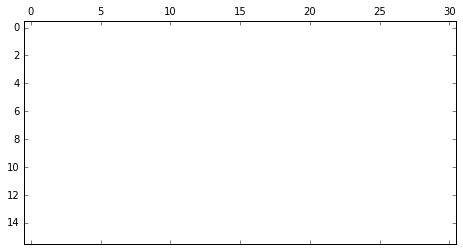

In [11]:
def matriz_ceros(n,m):
    '''
    argumentos: numero de filas n y de columnas m de una matriz
    devuelve una matriz llena de ceros de tamaño n x m
    '''
    
    # Creamos una matriz nula
    N = []

    # Creamos un bucle para llenar la matriz
    for i in xrange(0,n):         # el indice i recorrerá las filas
        a = []                    # a es una lista vacía que me sirve de variable auxiliar para guardar las filas
        for j in xrange(0,m):     # el indice j recorrerá las columnas
            a.append(0)           # lleno las filas con ceros
        N.append(a)               # agrego cada fila a la matriz
        
    return N

M = matriz_ceros(16,31)

plt.matshow(M,cmap=plt.cm.gray_r)

Necisitamos ahora definir nuestra condición inicial, esto es, cuáles células están vivas en el momento inicial. Sea el caso de una única célula viva en la mitad de nuestra cadena de células, entonces

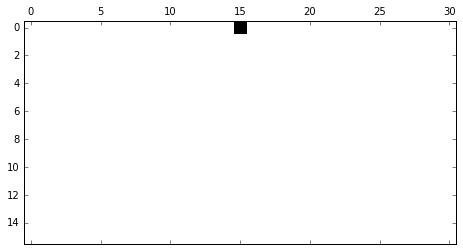

In [12]:
M[0][15]=1

plt.matshow(M,cmap=plt.cm.gray_r)

Ahora solo nos resta aplicar las reglas de vida para cada una de las generaciones siguientes. La regla especifica cómo las entradas de la matriz `M[i+1][:]` depende de la generación `M[i][:]` para `i>0`. Específicamente, la entrada `M[i+1][j]` dependerá de las entradas `M[i][j-1]`, `M[i][j]` y `M[i][j+1]` así:

<img src="regla150.png">

Debemos entonces implementar estas reglas y aplicarlas a cada generación. Por ejemplo, la regla 6 para la primera generación se implementaría de la siguiente manera:

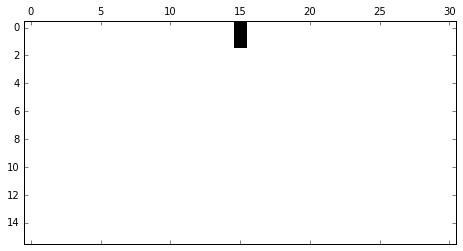

In [13]:
for i in xrange(1,len(M[0])-1):
    if M[0][i-1] == 0 and M[0][i] == 1 and M[0][i+1] == 0:
        M[1][i] = 1

plt.matshow(M,cmap=plt.cm.gray_r)

¿cómo implementaría las demás reglas únicamente para la primera generación?

¿cómo lo haría ahora para las subsiguientes generaciones?